<a href="https://colab.research.google.com/github/aniketmondal1210/CodePlayground/blob/main/EMML_SVM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing utilities
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats

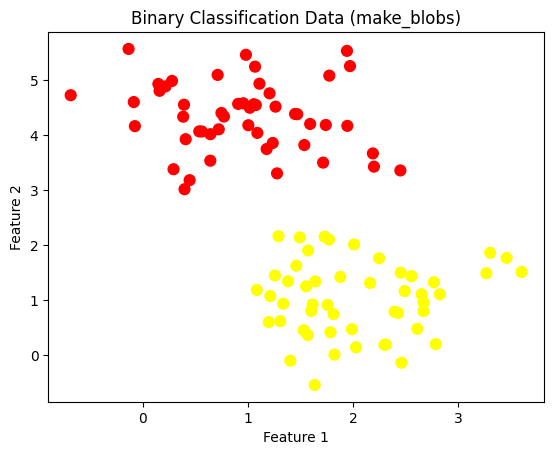

In [7]:
#Generating Binary Classification Data:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate binary classification dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.65)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='autumn');
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification Data (make_blobs)")
plt.show()


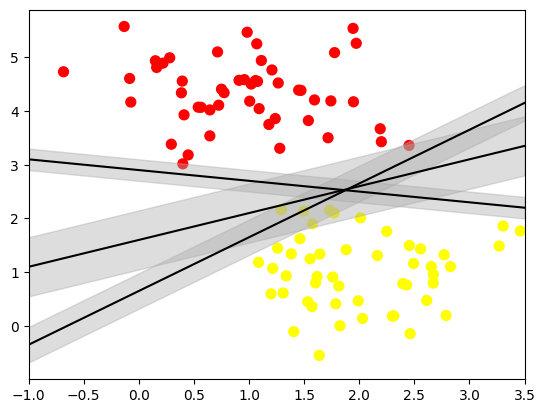

In [9]:
#Lets try to see the margin:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m,b,d in [(1,0.65,0.33), (0.5,1.6,0.55), (-0.2,2.9,0.2)]:
  yfit = m * xfit + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5)
plt.show()

In [11]:
#Lets build a SVM-C model to classify this data:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=10000000)
model.fit(X, y)

SVC(C=10000000, kernel='linear')

class sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]

**class sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale')**

**C float, default=1.0** Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared 12 penalty.

**kernel{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'), default='rbf'** Specifies the kernel type to be used in the algorithm. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable. If none is given, 'rbf' will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

**degree int, default=3** Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.

*gamma('scale', 'auto') or float, default='scale' * Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. If gamma='scale' (default) is passed then it uses 1/(n_features * X.var()) as value of gamma,

if 'auto', uses 1/n_features.

In [14]:
# Plotting:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
                levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

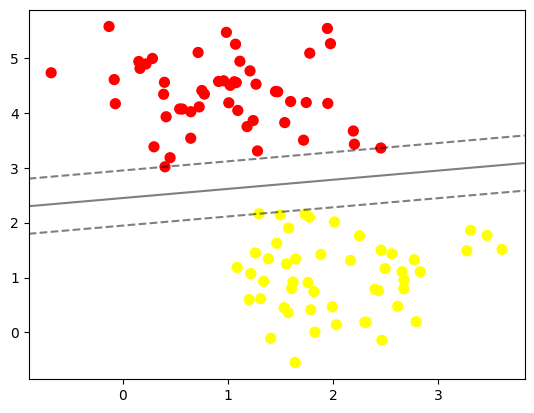

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [16]:
model.support_vectors_

array([[0.39920934, 3.01626962],
       [2.45161058, 3.35844964],
       [1.29273731, 2.16101743]])

In [17]:
# Using RBF kernal:
r = np.exp(-(X ** 2).sum(1))

In [19]:
# In Scikit-Learn, we can apply kernalized SVM simply by changing our linear
# kernal to an RBF (radial basis function) kernal, using the kernal model hyperparameter:
clf = SVC(kernel='rbf', C=10)
clf.fit(X, y)

SVC(C=10)

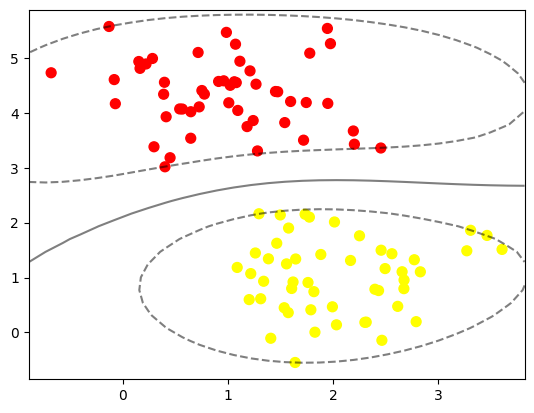

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [21]:
clf.support_vectors_

array([[ 0.39920934,  3.01626962],
       [-0.13280555,  5.57179133],
       [ 2.45161058,  3.35844964],
       [ 3.46137089,  1.76640683],
       [ 1.29273731,  2.16101743],
       [ 1.63691556, -0.54754839]])